# API Demo
Notebook demonstrating using the API (https://github.com/unmtransinfo/Badapple2-API).

## Setup

In [39]:
BASE_URL = "http://localhost:8000/api/v1"

In [1]:
# imports
import requests
from rdkit import Chem

## Getting Molecule and its Scaffolds
Demo getting molecules and their associated scaffolds + additional info.

In [44]:
def get_mol_scaffolds(mol_smiles: str):
    request_url = f"{BASE_URL}/compound_search/get_associated_scaffolds?SMILES={mol_smiles}"
    result = requests.get(request_url)
    res = {}
    if result.status_code == 200:
        res = result.json()
    else:
        print(result)
    return res

In [45]:
def get_scaf_legend(scaf_info: dict):
    s = f"{scaf_info['scafsmi']}\n"
    first = True
    for key, val in scaf_info.items():
        if key != "scafsmi":
            if not first:
                s += " | "
            s += f"{key}={val}"
            first = False
    return s

In [48]:
def get_mol_scaf_grid(mol_smiles: str):
    api_result = get_mol_scaffolds(mol_smiles)
    if api_result == {}:
        return None
    
    # process mol
    mol_cansmi = api_result["molecule_cansmi"]
    mol_legend = f"Molecule Canonical SMILES = {mol_cansmi}"
    mol = Chem.MolFromSmiles(mol_cansmi)

    # process scafs
    scaf_info_list = api_result["scaffolds"]
    scaf_mols = [Chem.MolFromSmiles(d['scafsmi']) for d in scaf_info_list]
    scaf_legends = [get_scaf_legend(d) for d in scaf_info_list]

    # combine and draw
    mol_matrix = [[mol], scaf_mols]
    legend_matrix = [[mol_legend], scaf_legends]
    return Chem.Draw.MolsMatrixToGridImage(molsMatrix=mol_matrix, legendsMatrix=legend_matrix, useSVG=True, subImgSize=(300, 300))

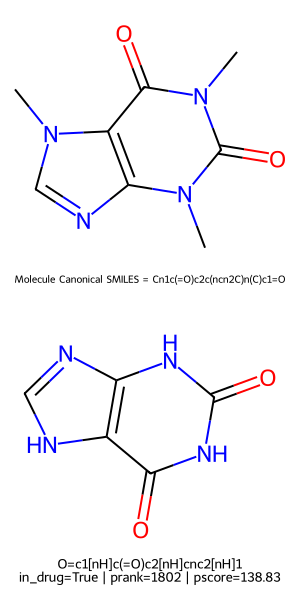

In [49]:
mol_smi = "CN1C(=O)N(C)C(=O)C(N(C)C=N2)=C12" # caffeine
get_mol_scaf_grid(mol_smi)